# Sheet 4

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import random

## 3 QDA
### (a)

In [5]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

pts_class0 = pts[labels == 0]
pts_class1 = pts[labels == 1]

mean_class0 = np.mean(pts_class0)
std_class0 = np.std(pts_class0)
print(f'Class 0: mean {mean_class0:2f}, std {std_class0:2f}')

mean_class1 = np.mean(pts_class1)
std_class1 = np.std(pts_class1)
print(f'Class 1: mean {mean_class1:2f}, std {std_class1:2f}')


Class 0: mean 0.105777, std 1.018518
Class 1: mean 2.105667, std 1.419657


### (b)

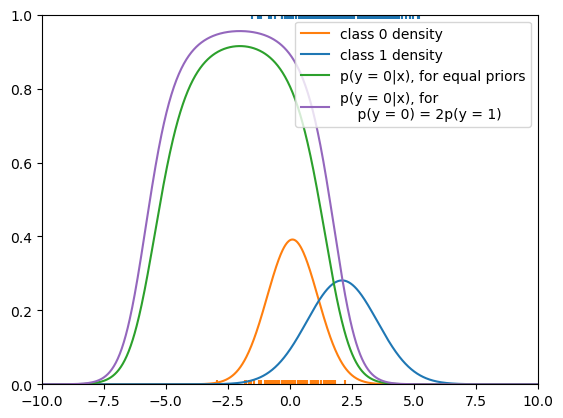

In [ ]:
#fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.scatter(pts_class0, np.zeros(pts_class0.shape), color='C1', marker='|')
ax.scatter(pts_class1, np.ones(pts_class1.shape), marker='|')

xs = np.linspace(-10, 10, 1000)
ys_0 = np.exp(-0.5*((xs - mean_class0)/std_class0)**2) / (std_class0 * np.sqrt(2*np.pi))
ax.plot(xs, ys_0, color='C1', label='class 0 density')
ys_1 = np.exp(-0.5*((xs - mean_class1)/std_class1)**2) / (std_class1 * np.sqrt(2*np.pi))
ax.plot(xs, ys_1, label='class 1 density')

posterior_eq = (0.5*ys_0) / (0.5*ys_0 + 0.5*ys_1)
ax.plot(xs, posterior_eq, color = 'C2', label='p(y = 0|x), for equal priors')

posterior_uneq = (2. * ys_0 / 3.) / (2. * ys_0 / 3. + ys_1 / 3.)
ax.plot(xs, posterior_uneq, color = 'C4', label='p(y = 0|x), for \n    p(y = 0) = 2p(y = 1)')

ax.legend()
plt.show()

The probability p(y = 0|x) is shifted to the left, since the points from class 0 are also more to the left compared to the points from class 1. The highest probability is around the point p=-2.5, where there are no points from class 1 and a bit of of points from class 0. After that the probability starts to decrease, and after it reaches the mean, it starts to drop more dramatically.

The shape of the posterior graph with unequal priors is similar, but it lies higher than the previous graph, because the prior probability of class zero is larger.

## 4 Trees and Random Forests

### (b)

In [6]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (b)

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set